In [28]:
import random 
import numpy as pd 
import torch 
import matplotlib.pyplot as plt

In [29]:
def synthetic_data(w,b,num_examples):
    x = torch.normal(0,1,(num_examples,len(w)))
    """
    torch.normal 
    用于生成符合正态分布（高斯分布）的张量，可指定均值、标准差和输出形状。

    mean：正态分布的均值（可以是标量或与输出形状匹配的张量）
    std：正态分布的标准差（可以是标量或与输出形状匹配的张量）
    size：输出张量的形状（若mean和std是标量时需要指定）
    generator：可选的随机数生成器
    out：可选的输出张量

    
    """

    y = torch.matmul(x,w) + b
    """
    用于执行张量的矩阵乘法
    （支持高维张量的批量矩阵乘法），行为类似数学中的矩阵乘法，但对高维张量有特殊处理。
    """

    y += torch.normal(0,0.01,y.shape)
    return x,y.reshape((-1,1))
true_w = torch.tensor([2,-3.4])
true_b = 4.2
features,labels = synthetic_data(true_w,true_b,1000)

'\n\u200bPyTorch 张量与 NumPy 的互操作性要求：\u200b\u200b\n\nPyTorch 张量（torch.Tensor）有一个 .numpy()方法，用于将其转换为 NumPy 数组（ndarray）。\n\u200b\u200b关键限制：\u200b\u200b .numpy()方法\u200b\u200b只能\u200b\u200b在满足以下条件的张量上调用：\n\n张量位于 \u200b\u200bCPU\u200b\u200b 上（不能是 CUDA 张量）。\n\n    张量\u200b\u200b不需要梯度\u200b\u200b（requires_grad=False）或者\u200b\u200b已经被分离\u200b\u200b（detached）。\n\n    如果一个张量 requires_grad=True（即它是计算图的一部分，需要计算梯度），\u200b\u200b直接对其调用 .numpy()会导致运行时错误！\u200b\u200b PyTorch 会阻止这种操作，因为 NumPy 数组本身没有自动微分能力，将需要梯度的张量转换成 NumPy 数组会使梯度计算变得不可能或不一致。\n\n\u200b\u200bdetach()的作用：\u200b\u200b\n\nfeatures[:, (1)].detach()和 labels.detach()正是为了解决上述限制。\n.detach()创建一个新的张量，这个新张量：\n\n\u200b\u200b共享原始张量的数据\u200b\u200b（内存相同）。\n\u200b\u200brequires_grad=False\u200b\u200b。\n\n    \u200b\u200b没有 grad_fn属性\u200b\u200b（与原始计算图分离）。\n\n这个新张量满足了 .numpy()方法的要求：它在 CPU 上（如果原始张量在 GPU，需要先 .cpu()，但这里假设已经在 CPU），并且 requires_grad=False。因此可以安全地调用 .numpy()。\n\n'

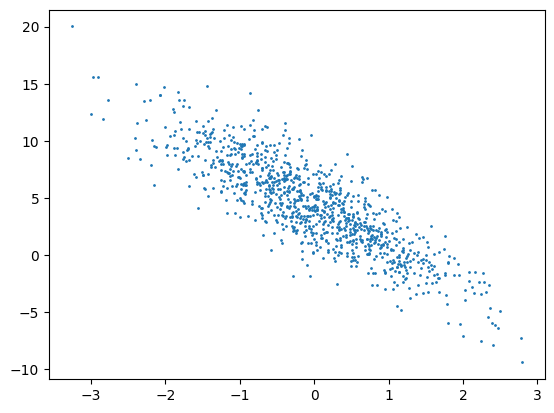

In [30]:
plt.scatter(
    features[:,(1)].detach().numpy(),
    labels.detach().numpy(),1
)
"""
​PyTorch 张量与 NumPy 的互操作性要求：​​

PyTorch 张量（torch.Tensor）有一个 .numpy()方法，用于将其转换为 NumPy 数组（ndarray）。
​​关键限制：​​ .numpy()方法​​只能​​在满足以下条件的张量上调用：

张量位于 ​​CPU​​ 上（不能是 CUDA 张量）。

    张量​​不需要梯度​​（requires_grad=False）或者​​已经被分离​​（detached）。

    如果一个张量 requires_grad=True（即它是计算图的一部分，需要计算梯度），​​直接对其调用 .numpy()会导致运行时错误！​​ PyTorch 会阻止这种操作，因为 NumPy 数组本身没有自动微分能力，将需要梯度的张量转换成 NumPy 数组会使梯度计算变得不可能或不一致。

​​detach()的作用：​​

features[:, (1)].detach()和 labels.detach()正是为了解决上述限制。
.detach()创建一个新的张量，这个新张量：

​​共享原始张量的数据​​（内存相同）。
​​requires_grad=False​​。

    ​​没有 grad_fn属性​​（与原始计算图分离）。

这个新张量满足了 .numpy()方法的要求：它在 CPU 上（如果原始张量在 GPU，需要先 .cpu()，但这里假设已经在 CPU），并且 requires_grad=False。因此可以安全地调用 .numpy()。

"""


In [31]:
def data_iter(batch_size,features,labels):
    num_examples = len(features)
    indice = list(range(num_examples))

    random.shuffle(indice)
    #打乱下标
    for i in range(0,num_examples , batch_size):
        batch_indices = torch.tensor(
            indice[i:min(i+batch_size,num_examples)]
        )
        yield features[batch_indices],labels[batch_indices]
#构建生成器 对于for其实是一个多次对next的获取然后异常捕获Stoppinginter
#每一次进入的时候 获得一次生成器的数值
for X,y in data_iter(10,features,labels):
    print(X,'\n',y)
    break

tensor([[-0.1590, -0.1214],
        [ 0.4533, -1.1183],
        [-0.2019, -1.9384],
        [ 0.4839,  0.6793],
        [ 0.8336, -0.1527],
        [-0.9952, -0.9289],
        [ 0.0726, -0.3629],
        [ 1.0798, -1.3643],
        [ 0.0133, -0.1700],
        [ 2.1379,  0.8147]]) 
 tensor([[ 4.2964],
        [ 8.8914],
        [10.3925],
        [ 2.8622],
        [ 6.3982],
        [ 5.3633],
        [ 5.5876],
        [11.0080],
        [ 4.8097],
        [ 5.7062]])


In [32]:
w = torch.normal(0,1,size=(2,1),requires_grad=True)
b = torch.zeros(1,requires_grad=True)

def Linear_model(w,b,featurs):
    return torch.matmul(featurs,w) + b 
def squared_loss(y_hat,y):
    return (y_hat - y.reshape(y_hat.shape))**2 

def sgd(params,lr,batch_size):
    with torch.no_grad():
        for param in params:
            param -=  lr* param.grad#对于pytorch来说，一个tensor的grad为这个tensor每一个元素
                                                 #的grad的和
            param.grad.zero_()



In [38]:
lr = 0.03
num_epoch =3
batch_size =10 
for epoch in range(num_epoch):
    for X,y in data_iter(batch_size=batch_size,features=features,labels=labels):
        y_hat = Linear_model(w,b,X)
        loss = squared_loss(y_hat,y)
        L2 = (0.001*w**2).sum()
        (loss.sum()/batch_size + L2).backward()
        sgd([w,b],lr,batch_size)
    with torch.no_grad():
        y_new = Linear_model(w,b,X)
        l = squared_loss(y_new,y)
        print(l.sum())

tensor(0.0010)
tensor(0.0013)
tensor(0.0009)


In [34]:
print(w,b)

tensor([[ 1.9979],
        [-3.3963]], requires_grad=True) tensor([4.2000], requires_grad=True)


In [35]:
from torch.utils.data import (
    DataLoader,
    Dataset,
    TensorDataset
)
def get_dataloader(args,batch_size):
    dataset = TensorDataset(*args)
    print(dataset[0])
    return DataLoader(dataset,batch_size=batch_size,shuffle=True)
dataloader = get_dataloader((features,labels),10)
next(iter(dataloader))


(tensor([-0.9307, -0.1720]), tensor([2.9276]))


[tensor([[-0.6648, -0.1760],
         [ 1.3378,  0.3484],
         [-0.8608, -0.4955],
         [ 0.0122, -1.1094],
         [-0.0364, -0.7744],
         [ 0.6332, -0.3576],
         [-0.0881, -0.2287],
         [ 1.0203, -0.9779],
         [-1.2443,  1.2001],
         [ 0.2193,  0.3170]]),
 tensor([[ 3.4684],
         [ 5.6959],
         [ 4.1745],
         [ 8.0122],
         [ 6.7534],
         [ 6.6733],
         [ 4.7962],
         [ 9.5489],
         [-2.3714],
         [ 3.5493]])]

In [36]:
from torch.nn import (
    Linear,
    Module,
    MSELoss
)
from torch.optim import SGD

net = Linear(2,1)
lossFUN = MSELoss()
optim_sgd = SGD(net.parameters(),lr=0.03)
for i in range(3):
    for data in dataloader:
        feature , label = data
        y_hat = net(feature)
        loss = lossFUN(y_hat,label)
        optim_sgd.zero_grad()
        loss.backward()
        optim_sgd.step()
       
    print(loss)
    print(optim_sgd.param_groups)

tensor(0.0002, grad_fn=<MseLossBackward0>)
[{'params': [Parameter containing:
tensor([[ 1.9982, -3.3952]], requires_grad=True), Parameter containing:
tensor([4.1940], requires_grad=True)], 'lr': 0.03, 'momentum': 0, 'dampening': 0, 'weight_decay': 0, 'nesterov': False, 'maximize': False, 'foreach': None, 'differentiable': False, 'fused': None}]
tensor(7.4232e-05, grad_fn=<MseLossBackward0>)
[{'params': [Parameter containing:
tensor([[ 2.0005, -3.3996]], requires_grad=True), Parameter containing:
tensor([4.1992], requires_grad=True)], 'lr': 0.03, 'momentum': 0, 'dampening': 0, 'weight_decay': 0, 'nesterov': False, 'maximize': False, 'foreach': None, 'differentiable': False, 'fused': None}]
tensor(0.0001, grad_fn=<MseLossBackward0>)
[{'params': [Parameter containing:
tensor([[ 2.0000, -3.4002]], requires_grad=True), Parameter containing:
tensor([4.1994], requires_grad=True)], 'lr': 0.03, 'momentum': 0, 'dampening': 0, 'weight_decay': 0, 'nesterov': False, 'maximize': False, 'foreach': No

In [37]:
print(torch.version.cuda)

12.6
